In [1]:
%matplotlib inline

In [2]:
import json
import gff3_parsing
from matplotlib import pyplot as plt

In [9]:
'''imports a dictionary and lets us see binding strength of the shine-dalgarno sequences'''
# with open('../Data/examples_for_testing/energyRef_CCUCCU_ensemble.json', 'r') as infile:
#        energy_dict = json.load(infile)
        
with open('../Data/examples_for_testing/energyRef_CCUCCU_mfe.json', 'r') as infile:
       energy_dict = json.load(infile)

In [4]:
#example of how to see binding strength(must use 6nt length)
energy_dict["ACGAGU"]

-2.9

In [10]:
new_df, new_genome = gff3_parsing.compile_sequences("../Data/examples_for_testing/ecoli.gff3",\
                                                    "../Data/examples_for_testing/ecoli.fasta", 20)

In [ ]:
new_df.head(10)

5

In [28]:
test_string = 'TTACAGAGTACACAACATCC'.replace("T", "U")

In [32]:
fragment = test_string[7:13]
print(fragment,energy_dict[fragment])

GUACAC -0.01


In [ ]:
energy_dict["ACACAA"]

In [11]:
# for upstream in new_df["upstream_sequence"][:10]:
#     test_string = upstream.replace("T", "U")
#     energy = energy_dict[test_string[9:15]]
    
#     new_df.at[upstream, "energy_binding"] = energy

# new_df.head(10)   

for index in new_df.index:
    upstream = new_df.loc[index,"upstream_sequence"]
    test_string = upstream.replace("T", "U")
    energy = energy_dict[test_string[9:15]]
    
    new_df.at[index, "energy_binding"] = energy

new_df.tail()

,genome_id,source,type,start,stop,idk,strand,trash,qualifiers,coding_sequence,upstream_sequence,energy_binding
10161,NC_000913.3,RefSeq,CDS,4636696,4638120,.,+,0,ID=cds-NP_418816.1;Parent=gene-b4399;Dbxref=Un...,ATGCGTATCGGCATGCGGTTGTTGCTGGGCTATTTTTTACTGGTGG...,TATAGCCTGAGGGGCCTGTA,-5.90
10163,NC_000913.3,RefSeq,CDS,4638178,4639530,.,+,0,ID=cds-NP_418817.1;Parent=gene-b4400;Dbxref=Un...,ATGTTGAAATCCCCCCTGTTCTGGAAAATGACTAGCCTGTTTGGTG...,CCATTGCAAAGGAGAAGACT,-7.23
10165,NC_000913.3,RefSeq,CDS,4639590,4640306,.,-,0,ID=cds-NP_418818.1;Parent=gene-b4401;Dbxref=Un...,ATGCAGACCCCGCACATTCTTATCGTTGAAGACGAGTTGGTAACAC...,TGGCAATTTAGGTAGCAAAC,-3.30
10167,NC_000913.3,RefSeq,CDS,4640402,4640542,.,+,0,ID=cds-NP_418819.1;Parent=gene-b4402;Dbxref=Un...,ATGACTAAAGTACGTAATTGCGTTCTTGATGCACTTTCCATCAACG...,ATTAACATGATCGGCGTAAC,-0.34
10169,NC_000913.3,RefSeq,CDS,4640942,4641628,.,+,0,ID=cds-NP_418820.1;Parent=gene-b4403;Dbxref=Un...,ATGCGTATAACGATTATTCTGGTCGCACCCGCCAGAGCAGAAAATA...,TGATCAAGAAGAGTGGCAAT,-0.55


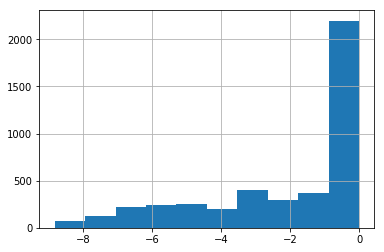

In [12]:
new_df["energy_binding"].hist()

(array([  70.,  130.,  218.,  246.,  248.,  203.,  400.,  297.,  370.,
        2197.]),
 array([-8.83 , -7.947, -7.064, -6.181, -5.298, -4.415, -3.532, -2.649,
        -1.766, -0.883, -0.   ]),
 <a list of 10 Patch objects>)

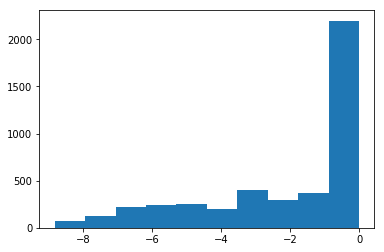

In [13]:
fig, ax = plt.subplots()
ax.hist(new_df["energy_binding"])

In [ ]:
test_string = 'TTACAGAGTACACAACATCC'

